In [1]:
#imports the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

[0.000e+00 0.000e+00 0.000e+00 9.000e-04 7.100e-03 1.360e-02 3.720e-02
 7.700e-02 1.212e-01 1.580e-01 1.791e-01 1.628e-01 1.176e-01 7.120e-02
 3.560e-02 1.430e-02 3.600e-03 7.000e-04 1.000e-04 0.000e+00 0.000e+00]


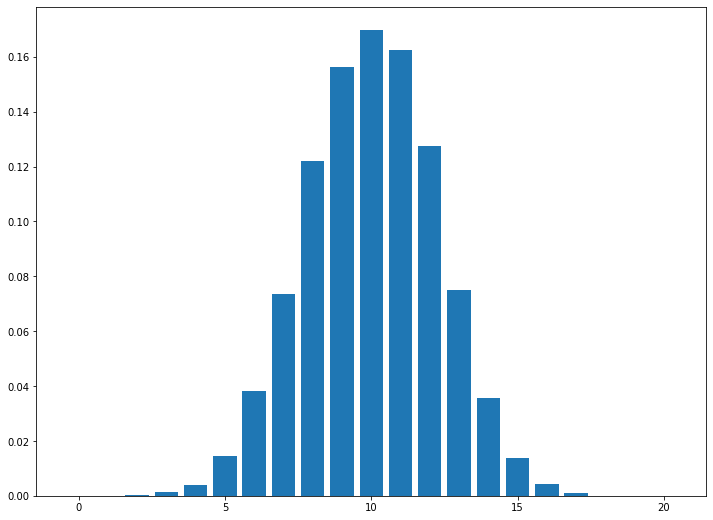

In [3]:
#Exercise 1

plt.figure(figsize =(12,9)) #defines a figure and sets its dimensions
def P(N,x):                #experimental Binomial Distribution function
    counts = np.zeros(x+1) #one of them may have no heads so = size+1
    totcounts = 0
    for i in range(0,N):
            draw = np.random.randint(2, size=x)            #defines draw as an array
            heads_count = len(draw[(np.where(draw == 1))]) #intermediate variable representing the number of heads
            tails_count = len(draw[(np.where(draw == 0))]) #intermediate variable representing the number of tails
            counts[heads_count] = counts[heads_count] + 1 #for x heads in a coin, indexes to the xth element of counts and adds 1
    return (counts/N) #returns probability of each coin returning heads over N trials

plt.bar(np.arange(21), P(10000,20)) #plots a histogram of each coin 
 
print (P(10000,20)) #prints the probability of flipping heads

#(a) Over N realizations, the above function will plot the results of the random coin flip. N needs to be large
#but not so large that it freezes the computer - I found 10,000 to be sufficient in providing an accurate 
#distribution.

#(b-c) Inputs are N(number of trials) and x(number of successes in N trials). Output is the probability (0<p<1)
#that a successful flip occurs. Some intermediate variables are used, see comments below. The variables are 
#filled through counting the length of the "draw" vector as it adds 0s and 1s depending on the outcome of each 
#trial.

#(d) The peak of the distribution is at the 10th coin - this is exactly what we would expect given this is a fair 
#coin flip with a 50% probability of success. 0.5*20 = 10, which is where we see our peak

<BarContainer object of 21 artists>

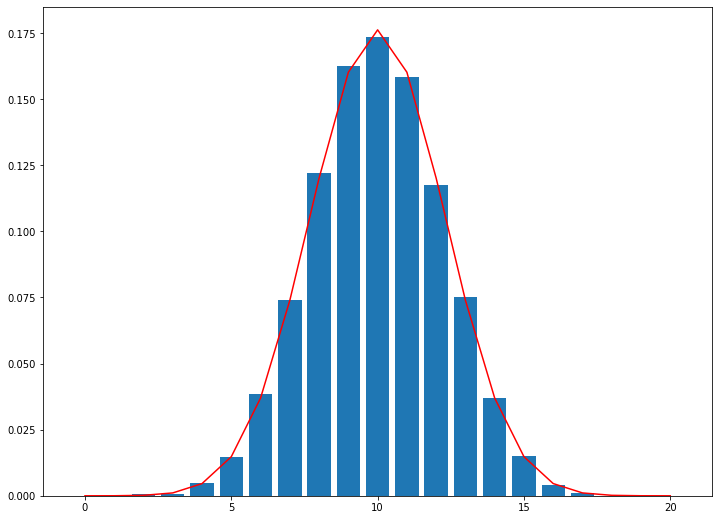

In [4]:
from scipy.special import factorial #imports the factorial expression

plt.figure(figsize =(12,9)) #defines a figure and its dimensions
def PNx(N): #analytical formula for the Binomial Distribution
    p = 0.5 #assuming a fair coin, probability 50% for success
    x = (np.arange(N+1)) #x as the number of successes
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx

plt.plot(np.arange(21), PNx(20), color = 'red') #plots line graph of binomial distribution
plt.bar(np.arange(21), P(10000,20)) #plots a histogram of each coin from the empirical Binomial Distribution

#(e) See the Binomial Distribution Derivation in the lab writeup.

In [5]:
def Evalth(N): #function for the expected value of our theoretical distribution
    e_val = 0
    for i in range(0,N):
        e_val = e_val + PNx(N)[i]*i #formula for expected value indexing through N iterations
    return e_val

def Evalex(N): #function for the expected value of our experimental distribution
    e_val = 0
    for i in range(0,N):
        e_val = e_val + P(10000,N)[i]*i #formula for expected value indexing through N iterations
    return e_val

print (Evalth(20)) #Expected theoretical value with 20 coins
print (Evalth(40)) #Expected theoretical value with 40 coins
print (Evalex(20)) #Expected empirical value with 20 coins
print (Evalex(40)) #Expected empirical value with 40 coins

#(f) As we would expect, the expected values are equal to half the number of coins flipped (roughly) with the 
#theoretical value being more accurate. This is the same as the analytical mean of the probability distribution
#mu=Np. 

#(f continued) Using functions is important but one should avoid writing too many if they apply to very specific
#cases. For example, I wrote a function for the exp. value of theoretical and empirical forms of the Binomial 
#Distribution, but I did not write a function for printing these expected values. If a function can be manipulated
#to be used in a variety of situations, it is useful to write.

9.999980926513672
19.999999999963624
10.128099999999998
19.924300000000002


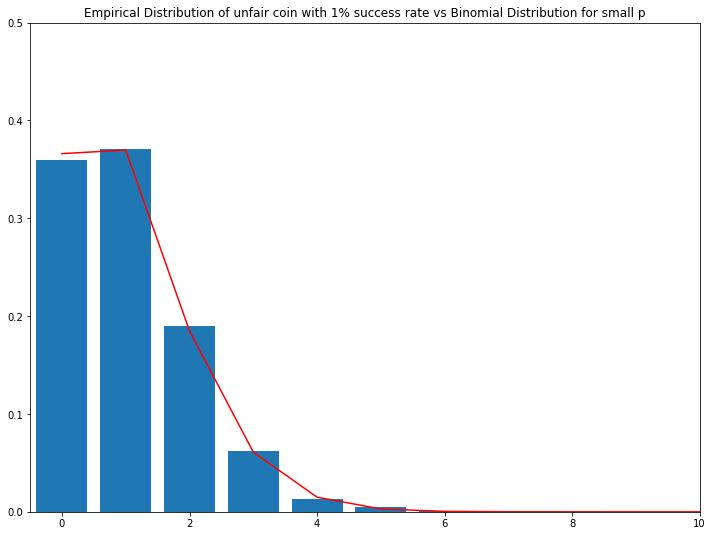

In [6]:
#Exercise 2

import math #imports math library for the exp function

def Pois(N,p): #Function for theoretical Poisson Distribution
    x = (np.arange(N+1))    
    Psx = ((N*p)**x*math.exp(-(N*p)))/factorial(x)
    return Psx
           
def PNxp(N,p): #Function for theoretical Binomial Distribution for variable p
    x = (np.arange(N+1))
    PNx = (factorial(N)/((factorial(x)*factorial(N-x))))*((p)**x)*(1-p)**(N-x)
    return PNx

def Pph(N,x,p): #Function for experimental Binomial Distribution
    counts = np.zeros(x+1) #one of them may have no heads so = size+1
    for i in range(0,N):
            draw = np.random.uniform(0,1,size=x)
            heads_count = len(draw[(np.where(draw <= p))]) #chooses a random number between 0 and 1, if this is less than p heads_count is indexed 
            tails_count = len(draw[(np.where(draw > p))]) #same as above but for tails
            counts[heads_count] = counts[heads_count] + 1 #for x heads in a coin, indexes to the xth element of counts and adds 1
    return (counts/N) #returns probability of each coin returning heads over N trials
    
plt.figure(figsize =(12,9))
plt.bar(np.arange(101), Pph(10000,100,0.01))
plt.xlim(-0.5,10)
plt.ylim(0,0.5)
plt.title("Empirical Distribution of unfair coin with 1% success rate vs Binomial Distribution for small p")
plt.plot(np.arange(101), PNxp(100,0.01), color = 'red')

#(a-b) See plot below
#(c) The Binomial Distribution for small p fits very nicely with our empirical histogram for small p

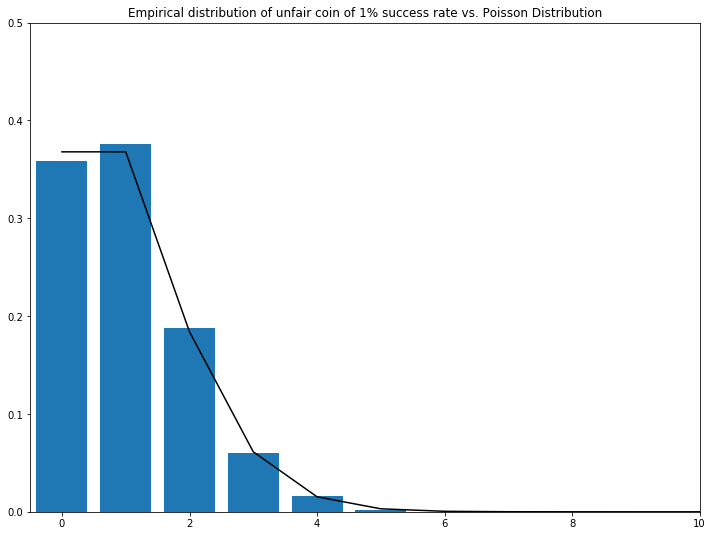

In [7]:
plt.figure(figsize =(12,9))
plt.bar(np.arange(101), Pph(10000,100,0.01))
plt.xlim(-0.5,10)
plt.ylim(0,0.5)
plt.title("Empirical distribution of unfair coin of 1% success rate vs. Poisson Distribution")
plt.plot(np.arange(101), Pois(100,0.01), color = 'black')

#(c continued) The empirical histogram also fits very nicely with our analytical Poisson Distribution. 
#Moreover, our analytical Poisson Distribution and analytical Binomial Distribution for small p produce
#almost exactly the same line

In [8]:
#Variance and Expected Value functions with actual Poisson Distribution

def Varp(N,p):
    e_valp = 0
    for i in range(0,N):
        e_valp = e_valp + (Pois(N,p)[i]*i**2-(Pois(N,p)[i]*i)**2) #summation of N terms in the Poisson Distribution
    return e_valp

def Expp(N,p):
    e_valc = 0
    for i in range(0,N):
        e_valc = e_valc + Pois(N,p)[i]*i
    return e_valc

#Variance and Expected Value with Empirical Data

def Varpe(N,p):
    sumexp = 0
    sumvar = 0
    sumvarsq = 0
    probs = Pph(10000,N,p)
    for i in range(0,N):
        sumexp += (probs[i]*i**2) #summation of N terms in x squared times probability
        sumvar += (probs[i]*i) #summation of N terms in expectation value squared
    return (sumexp - sumvar**2)

def Exppe(N,p):
    x = np.arange(N+1)
    e_valz = 0
    for i in range(0,N):
        e_valz = e_valz + Pph(10000,N,p)[i]*i
    return e_valz
                         
print (Varpe(20,0.01))  
print (Exppe(20,0.01))
print (Varpe(20,0.05))  
print (Exppe(20,0.05))

#(d)We expect the variance and the mean to be nearly the same for small p (that is, in the Poisson Distribution).
#As observed below, this is the case, with our variance and mean values diverging for larger p.

0.19533559
0.1981
0.9325985599999999
0.9983000000000001


In [117]:
probarr = np.zeros(20)
vararr = np.zeros(20)
exparr = np.zeros(20)

for i in range(0,20):
    probarr[i] = i*0.01
    vararr[i] = Varpe(20,probarr[i])
    exparr[i] = Exppe(20,probarr[i])

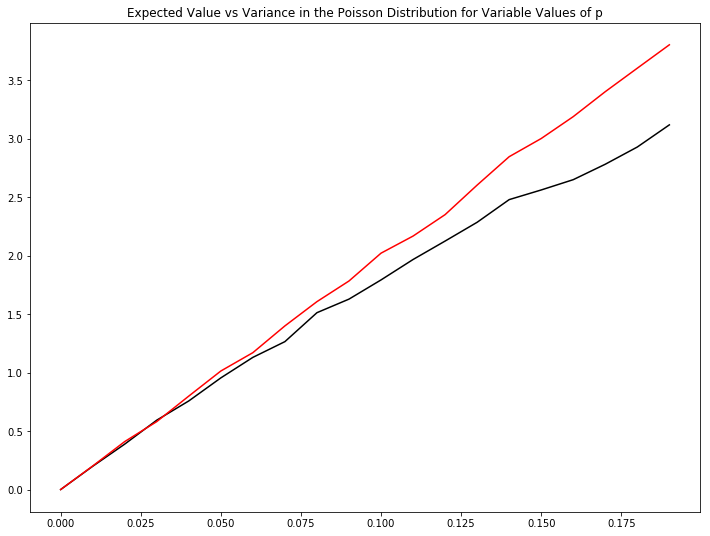

In [118]:
plt.figure(figsize =(12,9))
plt.title("Expected Value vs Variance in the Poisson Distribution for Variable Values of p")
plt.plot(probarr, vararr, color = 'black')
plt.plot(probarr, exparr, color = 'red')
plt.show()